## Imports and installs

In [1]:
!pip install multilabel-knn
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import string
import nltk
import re

from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk import word_tokenize

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

from ast import literal_eval
from collections import Counter
import pickle
# import multilabel_knn as mlk

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from nltk.corpus import stopwords
from sklearn.metrics import hamming_loss
import scipy.sparse
from sklearn.preprocessing import MultiLabelBinarizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read data and preprocess

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Date/wikinews_data.csv')
df.head()

,title,text,categories
0,President of China lunches with Brazilian Pres...,"Hu Jintao, the President of the People's Repub...","['Politics and conflicts', 'South America', 'A..."
1,Palestinians to elect new president on January 9,Mahmoud Abbas Acting president Rawhi Fattuh h...,"['Palestine', 'Elections', 'Mahmoud Abbas', 'Y..."
2,Brazilian delegation returns from Arafat funeral,The delegation representing Brazil at the fune...,"['Palestine', 'Brazil', 'Politics and conflict..."
3,Hearing begins over David Hookes death,A hearing started today over the death of Aust...,"['Australia', 'Cricket', 'Crime and law', 'Oce..."
4,Iran close to decision on nuclear program,Iranian representatives say negotiations with ...,"['Iran', 'Kamal Kharazi', 'Politics and confli..."


In [7]:
#First remove rows where categories is a string with len <= 2, this means
# there arent any categories

df1 = df.loc[df.categories.str.len() > 2]
df1

,title,text,categories
0,President of China lunches with Brazilian Pres...,"Hu Jintao, the President of the People's Repub...","['Politics and conflicts', 'South America', 'A..."
1,Palestinians to elect new president on January 9,Mahmoud Abbas Acting president Rawhi Fattuh h...,"['Palestine', 'Elections', 'Mahmoud Abbas', 'Y..."
2,Brazilian delegation returns from Arafat funeral,The delegation representing Brazil at the fune...,"['Palestine', 'Brazil', 'Politics and conflict..."
3,Hearing begins over David Hookes death,A hearing started today over the death of Aust...,"['Australia', 'Cricket', 'Crime and law', 'Oce..."
4,Iran close to decision on nuclear program,Iranian representatives say negotiations with ...,"['Iran', 'Kamal Kharazi', 'Politics and confli..."
...,...,...,...
21856,US Navy Secretary Richard Spencer resigns,"On Sunday, United States United States Secreta...","['North America', 'United States', 'Politics a..."
21857,Sources say Ibrahimovic may sign with Hammarby,Soccer player Zlatan Ibramovic may sign with s...,['Football']
21860,Trump visits Troops in Afghanistan,President Trump went to Afghanistan for the 1s...,"['Donald Trump', 'Afghanistan', 'Asia', 'Milit..."
21861,Bystanders foil knife-weilding man on London B...,"Yesterday, Usman Khan, 28, stabbed five people...","['Europe', 'United Kingdom', 'London', 'Crime ..."


In [8]:
#Remove rows with nan values

df2 = df1.dropna()
df2

,title,text,categories
0,President of China lunches with Brazilian Pres...,"Hu Jintao, the President of the People's Repub...","['Politics and conflicts', 'South America', 'A..."
1,Palestinians to elect new president on January 9,Mahmoud Abbas Acting president Rawhi Fattuh h...,"['Palestine', 'Elections', 'Mahmoud Abbas', 'Y..."
2,Brazilian delegation returns from Arafat funeral,The delegation representing Brazil at the fune...,"['Palestine', 'Brazil', 'Politics and conflict..."
3,Hearing begins over David Hookes death,A hearing started today over the death of Aust...,"['Australia', 'Cricket', 'Crime and law', 'Oce..."
4,Iran close to decision on nuclear program,Iranian representatives say negotiations with ...,"['Iran', 'Kamal Kharazi', 'Politics and confli..."
...,...,...,...
21856,US Navy Secretary Richard Spencer resigns,"On Sunday, United States United States Secreta...","['North America', 'United States', 'Politics a..."
21857,Sources say Ibrahimovic may sign with Hammarby,Soccer player Zlatan Ibramovic may sign with s...,['Football']
21860,Trump visits Troops in Afghanistan,President Trump went to Afghanistan for the 1s...,"['Donald Trump', 'Afghanistan', 'Asia', 'Milit..."
21861,Bystanders foil knife-weilding man on London B...,"Yesterday, Usman Khan, 28, stabbed five people...","['Europe', 'United Kingdom', 'London', 'Crime ..."


In [ ]:
#Make the column value, from string list to list type 

def transform (row):
    list_of_categories = row['categories'].strip("][").split(', ')
    list_of_categories = [str.replace("'", "") for str in list_of_categories]
    print(list_of_categories)
    return list_of_categories

df2['categories_array'] = df2.apply(transform, axis=1)
df2

In [10]:
#Select columns
df2 = df2[["title", 'text', 'categories_array']]

In [11]:
#Get all categories and from them select top 20

all_categories = df2.categories_array.sum()
take_top = 20

counts = Counter(all_categories)
sorted_c = sorted(counts.items(), key=lambda pair: pair[1], reverse=True)

print(len(all_categories))
print(len(Counter(all_categories).keys()))

145860
3844


<Axes: xlabel='category'>

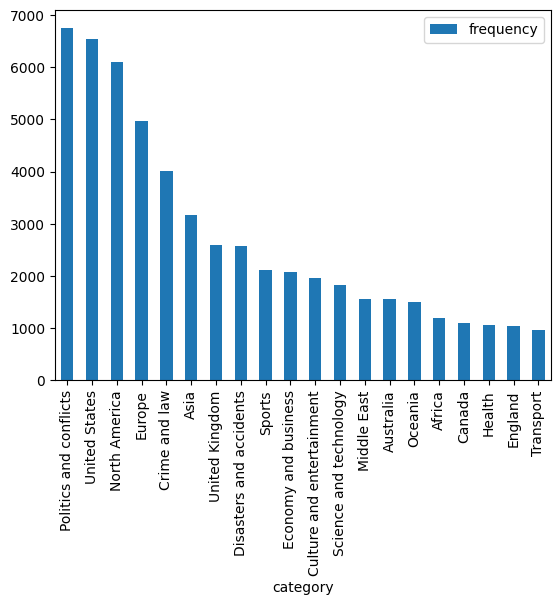

In [12]:
#Make a histogram with number of instances of top classes

dataf_category = pd.DataFrame(sorted_c[:take_top], columns=['category', 'frequency'])
dataf_category.plot(kind='bar', x='category')

In [45]:
# Save categories in a file
list_category_selected = dataf_category['category'].tolist()
print(list_category_selected)

['Politics and conflicts', 'United States', 'North America', 'Europe', 'Crime and law', 'Asia', 'United Kingdom', 'Disasters and accidents', 'Sports', 'Economy and business', 'Culture and entertainment', 'Science and technology', 'Middle East', 'Australia', 'Oceania', 'Africa', 'Canada', 'Health', 'England', 'Transport']


In [14]:
#This keeps only the selected categories for every line of the csv
def filter_categories(row):
    selected_categories = [category for category in row['categories_array'] if category in list_category_selected]
    return selected_categories

#Function to clear and preprocess text
def clean_text(text):
    
    '''Make text lowercase, remove links, remove punctuation, remove end line, 
    remove words containing special char, lemmatize'''
    
    lemmatizer = WordNetLemmatizer()
#     words_english = set(nltk.corpus.words.words())
    
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    #Remove string "wa" & "s" & "ha" after they appear in wordcloud but doesnt have meaning
    text = re.sub(r"\bs\b", '', text )

    text = ' '.join([ word for word in word_tokenize(text) if word == re.sub(r'[^a-zA-Z]', '', word)])
#     text = ' '.join(word for word in word_tokenize(text) if word in words_english)
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    print(text)

    return text

def clean_text_row(row):
    clean = clean_text(row['text'])
    return clean

In [15]:
df2['categories'] = df2.apply(filter_categories, axis=1)

In [ ]:
df2['text_clean'] = df2.apply(clean_text_row, axis=1)

In [19]:
#Instanstiate a class to one hot encode the categories for every line from the csv
#Also select only a part from the csv because of bottlenecks in training
mlb = MultiLabelBinarizer()
max_instances = 10000
train_instances = 8000
test_instances  = 2000

In [20]:
df2 = df2.loc[df2.categories.str.len() > 2]
df_preprocessed = df2[["title", 'text_clean', 'categories']]
df_preprocessed.reset_index(drop=True, inplace=True)
df_preprocessed = df_preprocessed[:max_instances]
df_preprocessed

,title,text_clean,categories
0,Hearing begins over David Hookes death,a hearing started today over the death of aust...,"[Australia, Crime and law, Oceania]"
1,Colin Powell Resigns as U.S. Secretary of Stat...,colin powell united state secretary of state c...,"[United States, Politics and conflicts, North ..."
2,High-speed train derailment in central Queensl...,people have been injured seriously so in a hig...,"[Australia, Disasters and accidents, Oceania]"
3,Florida's Walt Disney World launches revamped ...,alien encounter and the living sea at the walt...,"[United States, Culture and entertainment, Nor..."
4,Senator Harry Reid elected Democratic minority...,democratic senator harry reid ha been elected ...,"[United States, Politics and conflicts, North ..."
...,...,...,...
9995,DibabaвЂ™s comeback: Long-distance track star ...,left won her first world championship title in...,"[Europe, Africa, Sports]"
9996,First Australian election debate: immigration ...,prime minister of australia kevin rudd and sam...,"[Australia, Politics and conflicts, Oceania]"
9997,Britain's most experienced astronaut retires a...,michael foale on the mirbritish born astronaut...,"[United Kingdom, Europe, United States, North ..."
9998,Scottish politician David McLetchie dies at ag...,a former leader of the scottish scottish conse...,"[United Kingdom, Europe, Politics and conflicts]"


In [47]:
#Make a new dataframe with one hot categories for every line of data
df_onehot = pd.DataFrame(mlb.fit_transform(df_preprocessed['categories']),columns=mlb.classes_, index=df_preprocessed.index)
list_category_selected = list(df_onehot.columns)
with open('/content/drive/MyDrive/Date/categories.pkl','wb') as f:
  pickle.dump(list(df_onehot.columns), f)
df_onehot


,Africa,Asia,Australia,Canada,Crime and law,Culture and entertainment,Disasters and accidents,Economy and business,England,Europe,Health,Middle East,North America,Oceania,Politics and conflicts,Science and technology,Sports,Transport,United Kingdom,United States
0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9996,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
9998,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


array([[<Axes: title={'center': 'sum'}>]], dtype=object)

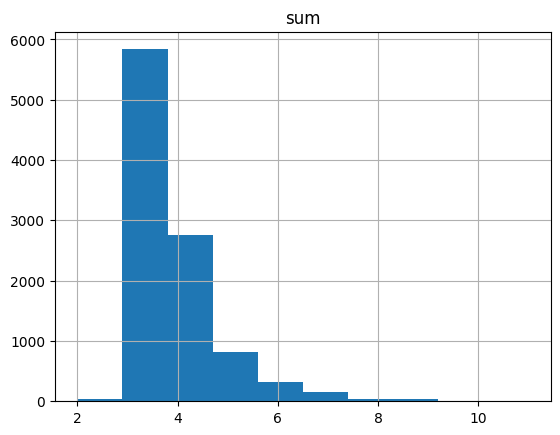

In [22]:
df_onehot['sum'] = df_onehot[list(df_onehot.columns)].sum(axis=1)
df_onehot.hist(column='sum')

In [23]:
df_onehot = df_onehot.drop('sum', axis=1)
df_onehot_train = df_onehot.loc[:train_instances-1]
df_onehot_test = df_onehot.loc[train_instances:]

train_Y = df_onehot_train.to_numpy()
test_Y = df_onehot_test.to_numpy()
test_Y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [24]:
texts = df_preprocessed['text_clean'].to_numpy()
texts = texts[:max_instances]
text_train = texts[:train_instances]
text_test = texts[train_instances:]

print(text_train.shape)
print(text_test.shape)

print(train_Y.shape)
print(test_Y.shape)

(8000,)
(2000,)
(8000, 20)
(2000, 20)


# Extracting features and training

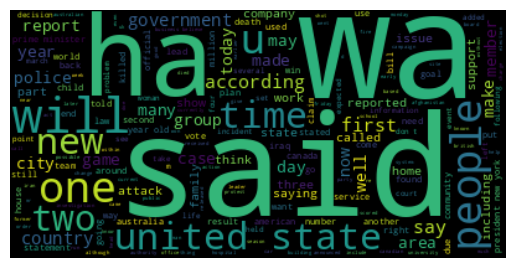

In [28]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(" ".join(text_train))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(text_train)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(45)

,tfidf
powell,0.565423
resignation,0.276142
bush,0.234771
colin,0.221900
president,0.182804
state,0.175403
his,0.163703
her,0.160555
hawkish,0.148548
george,0.124447


In [25]:
#Extract features with tfidf
import joblib
stop_words = set(stopwords.words('english'))
tfidfvectorizer = TfidfVectorizer(stop_words='english')

tfidf_train = tfidfvectorizer.fit_transform(text_train)
tfidf_test  = tfidfvectorizer.transform(text_test)

joblib.dump(tfidfvectorizer, open("/content/drive/MyDrive/Date/vectorizer.pkl", "wb"))

In [26]:
# tfidf_tokens = tfidfvectorizer.get_feature_names()
# print(len(tfidf_tokens))
print(tfidf_test.toarray().shape)

train_X = tfidf_train.toarray()
test_X = tfidf_test.toarray()

print(train_X.shape)
print(train_Y.shape)

(2000, 62166)
(8000, 62166)
(8000, 20)


# Train model 

In [27]:
#Functions to extract classes from one hot encode

import scipy.sparse

def get_classes(list_classes, one_hot):
  result = []

  for idx, i in enumerate(one_hot):
    if i:
      result.append(list_classes[idx])
  return result

def get_classes_by_idx(idx, test, pred):
  ground_truth = test[idx]
  result = scipy.sparse.csr_matrix.toarray(pred[idx]).astype(int)[0]

  gt_classes = get_classes(list_category_selected, ground_truth)
  res_classes = get_classes(list_category_selected, result)
  
  return gt_classes, res_classes

In [28]:
#Function to test model performances

def micro_f1score(Y_test, Y_pred):
    true_pos_num = Y_pred.multiply(Y_test).sum()
    pos_num = Y_pred.sum()
    true_num = Y_test.sum()

    # Recall
    prec, recall = (
        true_pos_num / np.maximum(pos_num, 1),
        true_pos_num / np.maximum(true_num, 1),
    )
    f1 = 2 * prec * recall / np.maximum(prec + recall, 1e-12)
    return f1


def macro_f1score(Y_test, Y_pred):
    true_pos_num = np.array(Y_pred.multiply(Y_test).sum(axis=0)).reshape(-1)
    pos_num = np.array(Y_pred.sum(axis=0)).reshape(-1)
    true_num = np.array(Y_test.sum(axis=0)).reshape(-1)

    # Recall
    prec, recall = (
        true_pos_num / np.maximum(pos_num, 1),
        true_pos_num / np.maximum(true_num, 1),
    )
    f1 = 2 * prec * recall / np.maximum(prec + recall, 1e-12)
    return np.mean(f1)

In [29]:
import multilabel_knn as mlk
model = mlk.binom_multilabel_kNN(k=10, metric = "cosine")
model.fit(train_X, train_Y)

Y_pred = model.predict(test_X)


In [31]:
print(micro_f1score(test_Y, Y_pred))# micro f1
print(macro_f1score(test_Y, Y_pred)) # macro f1
print(hamming_loss(test_Y, Y_pred))

0.6180805542348706
0.5660199167478523
0.140575


# Save preprocessed dataset, model 

In [33]:
#Save model
joblib.dump(model, open('/content/drive/MyDrive/Date/model_trained', "wb"))

In [36]:
#Save test data

with open('/content/drive/MyDrive/Date/test_X.pkl','wb') as f:
  pickle.dump(test_X, f)

with open('/content/drive/MyDrive/Date/test_Y.pkl','wb') as f:
  pickle.dump(test_Y, f)

In [37]:
#Save train data

with open('/content/drive/MyDrive/Date/train_X.pkl','wb') as f:
  pickle.dump(train_X, f)

with open('/content/drive/MyDrive/Date/train_Y.pkl','wb') as f:
  pickle.dump(train_Y, f)

In [35]:
# load the model from disk
loaded_model = joblib.load(open('/content/drive/MyDrive/Date/model_trained', 'rb'))
Y_pred = loaded_model.predict(test_X) 

In [51]:
print(get_classes_by_idx(2, test_Y, Y_pred))

(['Asia', 'Middle East', 'Politics and conflicts'], ['Asia', 'Crime and law', 'Politics and conflicts'])
